In [1]:
## 1. Import Thư Viện Cần Thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Cài đặt hiển thị đồ thị
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
## 2. Tải Dữ Liệu
try:
    df = pd.read_csv('data.csv')
    print("Đã tải file data.csv thành công.")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file data.csv. Vui lòng chạy notebook 1 trước.")
    exit()

print(f"\nKích thước dữ liệu ban đầu: {df.shape}")
print("\nKiểm tra dữ liệu thiếu:")
print(df.isnull().sum())


Đã tải file data.csv thành công.

Kích thước dữ liệu ban đầu: (50000, 11)

Kiểm tra dữ liệu thiếu:
SongID             0
Title              0
Artist             0
Genre              0
SubGenre           0
Album              0
ReleaseYear        0
Popularity         0
Duration_ms        0
Tags               0
Lyrics_Keywords    0
dtype: int64


In [3]:
df.head()

,SongID,Title,Artist,Genre,SubGenre,Album,ReleaseYear,Popularity,Duration_ms,Tags,Lyrics_Keywords
0,VN_S_00001,Xa Em Buồn - Yvonne,Trúc Nhân,Ballad,Ballad Acoustic,Automated methodical policy Collection,1999,35.367666,176868,"quán cà phê, tâm trạng, remix","mưa, nắng, chia tay"
1,VN_S_00002,Kỷ Niệm Đẹp,Grey D,Ballad,Ballad Orchestral,Public-key 3rdgeneration encryption Collection,2015,24.855807,292853,"vui vẻ, thập niên 90","kỷ niệm, mưa, tình yêu, anh, em"
2,VN_S_00003,Đêm Vui,Mono,V-Pop,Pop-Ballad,Secured static implementation Collection,2007,41.595909,175353,"acoustic, tập trung","tim, nhớ, buồn"
3,VN_S_00004,Nắng Tàn Phai - Timothy,Bích Phương,Bolero,Tân Cổ Giao Duyên,Devolved responsive encryption Collection,2013,15.996758,200407,"tâm trạng, lãng mạn, vui vẻ","nắng, chia tay, tim, anh"
4,VN_S_00005,Đêm Tàn Phai,Jack,Ballad,Ballad Piano,Self-enabling intangible encoding Collection,2006,55.028308,204921,"tập trung, tâm trạng, buồn","tim, chia tay, tình yêu, nhớ, anh"


In [4]:
# Feature quan trọng cho TF-IDF: Title, Artist, Genre, SubGenre, Tags, Lyrics_Keywords
# Ta sẽ kết hợp các trường này thành một trường 'Content' duy nhất.

def clean_text(text):
    """Hàm chuẩn hóa văn bản: chuyển sang chữ thường, loại bỏ ký tự đặc biệt."""
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s,]', '', text) # Chỉ giữ lại chữ, số, khoảng trắng, dấu phẩy
    return text


In [5]:
# Áp dụng làm sạch cho các cột liên quan
df['Title_Clean'] = df['Title'].apply(clean_text)
df['Artist_Clean'] = df['Artist'].apply(clean_text)
df['Genre_Clean'] = df['Genre'].apply(clean_text)
df['SubGenre_Clean'] = df['SubGenre'].apply(clean_text)
df['Tags_Clean'] = df['Tags'].apply(clean_text)
df['Lyrics_Keywords_Clean'] = df['Lyrics_Keywords'].apply(clean_text)

In [6]:
# **Tạo trường 'Content' để áp dụng TF-IDF**
# Nội dung của mỗi "tài liệu" (bài hát) sẽ bao gồm các feature đã được chuẩn hóa.
# Ta nhân đôi các từ quan trọng (Artist, Genre) để tăng trọng số của chúng.
df['Content'] = (
    df['Title_Clean'] + ' ' + 
    df['Artist_Clean'] + ' ' + df['Artist_Clean'] + ' ' + # Nhân đôi Artist để tăng trọng số
    df['Genre_Clean'] + ' ' + df['Genre_Clean'] + ' ' +  # Nhân đôi Genre
    df['SubGenre_Clean'] + ' ' + 
    df['Tags_Clean'].str.replace(', ', ' ') + ' ' + # Thay ',' bằng ' ' để TFIDF coi là các từ riêng biệt
    df['Lyrics_Keywords_Clean'].str.replace(', ', ' ')
)

In [7]:
print("\n5 dòng dữ liệu sau khi tạo trường 'Content':")
print(df[['SongID', 'Title', 'Content']].head())


5 dòng dữ liệu sau khi tạo trường 'Content':
       SongID                    Title  \
0  VN_S_00001      Xa Em Buồn - Yvonne   
1  VN_S_00002              Kỷ Niệm Đẹp   
2  VN_S_00003                  Đêm Vui   
3  VN_S_00004  Nắng Tàn Phai - Timothy   
4  VN_S_00005             Đêm Tàn Phai   

                                             Content  
0  xa em bun  yvonne trc nhn trc nhn ballad balla...  
1  k nim p grey d grey d ballad ballad ballad orc...  
2  m vui mono mono vpop vpop popballad acoustic t...  
3  nng tn phai  timothy bch phng bch phng bolero ...  
4  m tn phai jack jack ballad ballad ballad piano...  


In [8]:
## 4. Chuẩn hóa các trường số (EDA)

# Chuẩn hóa cột Popularity (từ 0 đến 1)
scaler = MinMaxScaler()
df['Popularity_Normalized'] = scaler.fit_transform(df[['Popularity']])


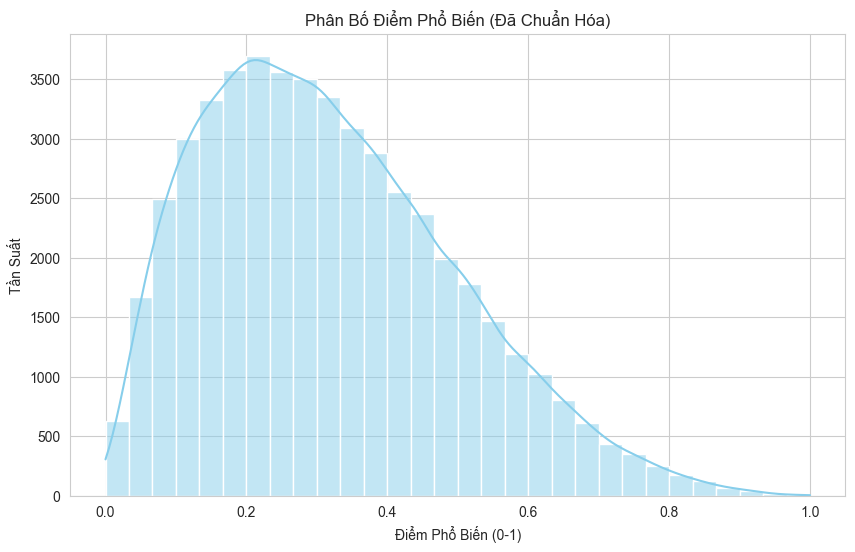

In [9]:
## 5. Vẽ Biểu Đồ Minh Họa (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity_Normalized'], bins=30, kde=True, color='skyblue')
plt.title('Phân Bố Điểm Phổ Biến (Đã Chuẩn Hóa)')
plt.xlabel('Điểm Phổ Biến (0-1)')
plt.ylabel('Tần Suất')
plt.show()
# 


In [10]:
## 6. Lưu Dữ Liệu Đã Chuẩn Hóa (data_EDA.csv)
# Chỉ giữ lại các cột cần thiết cho mô hình và triển khai
df_eda = df[['SongID', 'Title', 'Artist', 'Genre', 'ReleaseYear', 'Popularity_Normalized', 'Content']].copy()

try:
    df_eda.to_csv('data_EDA.csv', index=False)
    print("\nĐã lưu dữ liệu đã chuẩn hóa thành công vào file: data_EDA.csv")
    print(f"Kích thước file data_EDA.csv: {df_eda.shape}")
except Exception as e:
    print(f"Lỗi khi lưu file: {e}")


Đã lưu dữ liệu đã chuẩn hóa thành công vào file: data_EDA.csv
Kích thước file data_EDA.csv: (50000, 7)
